## Churn analysis of telco customer dataset
**DATASET:**- A sample telecommunications dataset comprising customer information, illustrating customers who churned in the previous month.

In [1]:
#libraries required for the implementation of Eda
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

#### loading the dataset

In [2]:
base_dataset = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
base_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
base_dataset.shape

(7043, 21)

In [5]:
base_dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
#checking all the data types of each features
base_dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#checking the descriptive statistics of the numerical features of the telco dataset
base_dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- As evident from the above, specific features lack accurate data typing, necessitating the conversion of these features to their appropriate data types.
- The 'Senior Citizen' attribute is of categorical type, rendering the representation in the 'describe' function as an inaccurate reflection of statistical data.
- The observation reveals that the tenure of 75% of customers is less than 55 months.
- On average, customers are charged USD 64.76 per month, with over 25% of them paying in excess of USD 89.85 per month.

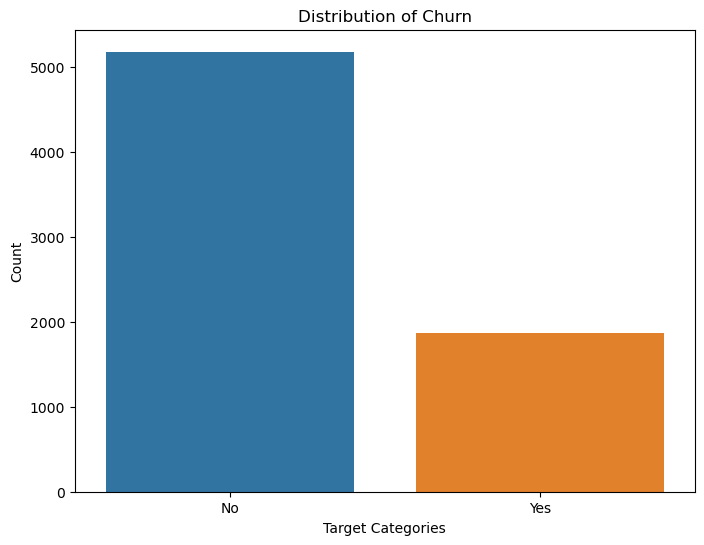

In [8]:
#checking the number of churn in the dataset
plt.figure(figsize=(8, 6))

sns.countplot(data=base_dataset, x='Churn')

plt.title('Distribution of Churn')
plt.xlabel('Target Categories')
plt.ylabel('Count')

plt.show()

In [9]:
#Exact numbers of churned customer with not churned
base_dataset['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
# Ratio of churned customers and nout churned customers
100*base_dataset['Churn'].value_counts()/len(base_dataset['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

- As we can see in above that data is highly imbalanced with respect to churn customer
- ration of **churn(Yes):churn(No)** is **73:26**
- this can cause biasness in the model which can lead to overfitting so we have to fix this 
- We will compare this target feature 'Churn' with resepect to other Features in the data to get some insight about whole dataseet

In [11]:
base_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


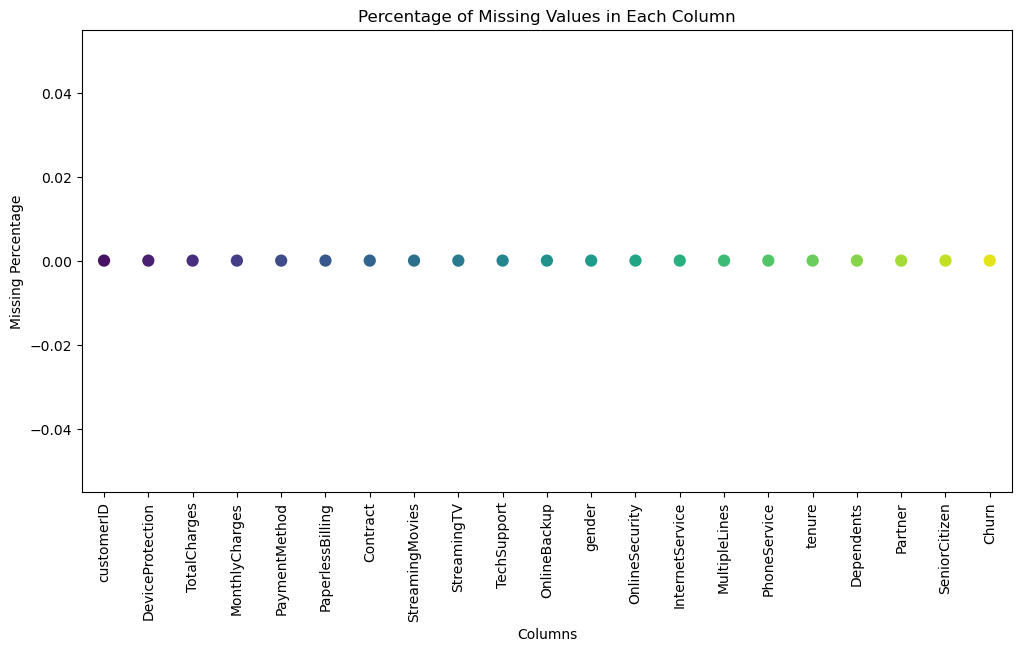

In [12]:
missing_percent = (base_dataset.isnull().sum() / len(base_dataset)) * 100
missing_df = pd.DataFrame({'Column': missing_percent.index, 'MissingPercentage': missing_percent.values})

# Sort the DataFrame by missing percentage in descending order
missing_df = missing_df.sort_values(by='MissingPercentage', ascending=False)

# Create a bar plot to visualize missing percentage
plt.figure(figsize=(12, 6))
sns.pointplot(data=missing_df, x='Column', y='MissingPercentage', palette='viridis')
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.show()

- We have not converted the datatype of the features so it is difficult to say that there are no null values

In [45]:
copy_dataset = base_dataset.copy()

In [46]:
# So changing the data type of Total charges to float from object datatype
copy_dataset.TotalCharges = pd.to_numeric(copy_dataset.TotalCharges, errors='coerce')

In [15]:
(copy_dataset.isnull().sum() / copy_dataset.shape[0]) * 100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

- we can that the percentage of missing value in total charges feature is .15 % we can safely drop it
- As the number of null values is very small we can drop the null values in the feature TotalCharges because it is safe to drop the null values it will not impact the final outcome

In [16]:
#since the percentage of missing value
copy_dataset.dropna(how='any', inplace = True)

- Categorizing customers into groups according to their tenure: for tenures less than 12 months, assign the group "1-12"; for tenures spanning 1 to 2 years, assign the group "13-24"; and so forth.

In [17]:
copy_dataset['tenure'].max()

72

In [18]:
# Group the tenure  in bins of 12 months
labels = ["{0} - {1}".format(i, i+11) for i in range (1, 72, 12)]
copy_dataset['tenure_group'] = pd.cut(copy_dataset.tenure, range(1, 80, 12), right = False, labels=labels)

In [20]:
copy_dataset.tenure_group.value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [22]:
copy_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [23]:
labels

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']

In [24]:
# dropping the customer id and tenure feature from the data
copy_dataset.drop(columns=['customerID', 'tenure'], axis = 1, inplace = True)
copy_dataset.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## DATA EXPLORATION
**plotting each independent predictor with respect to churn**

### Univariate analysis

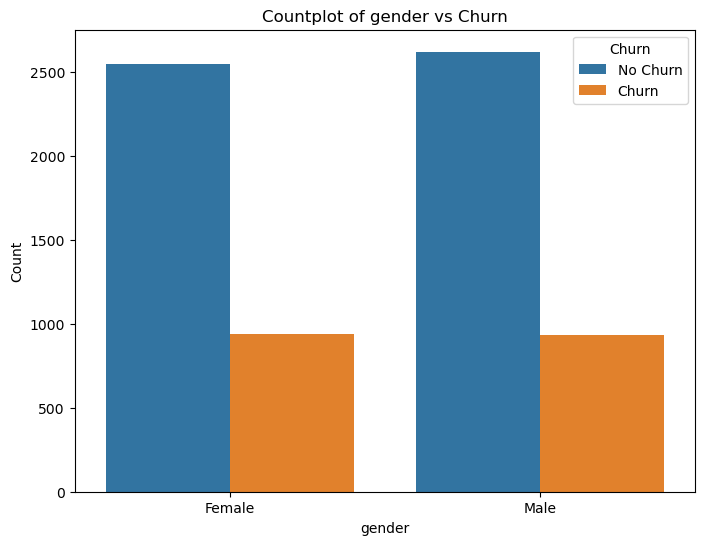

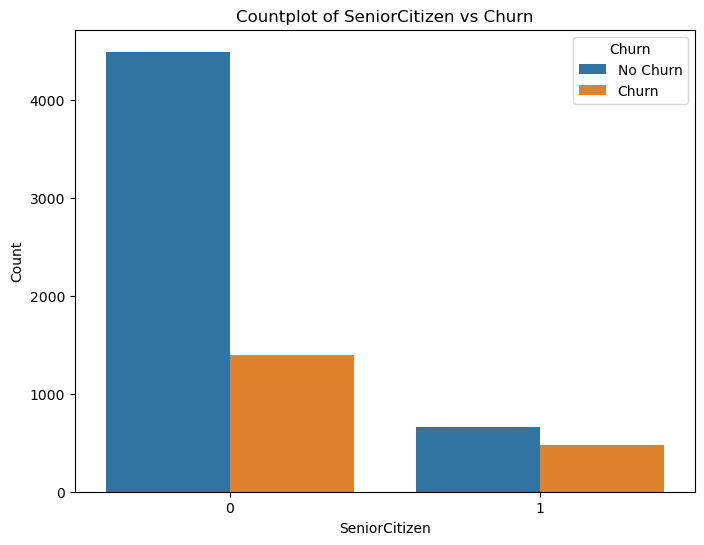

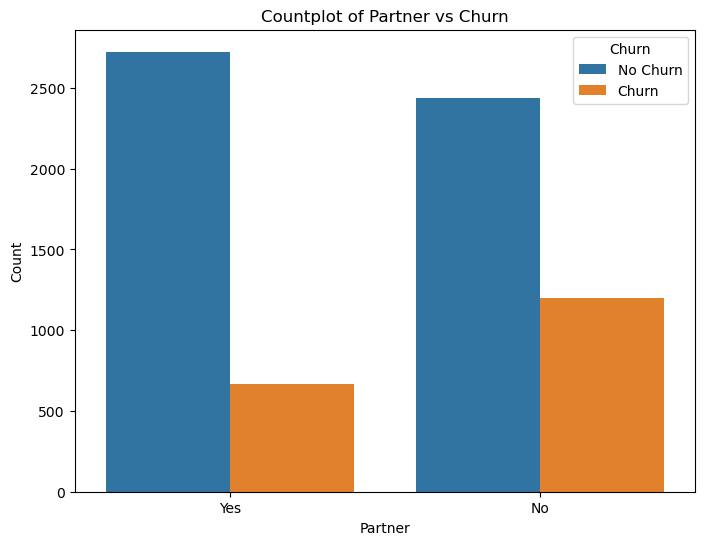

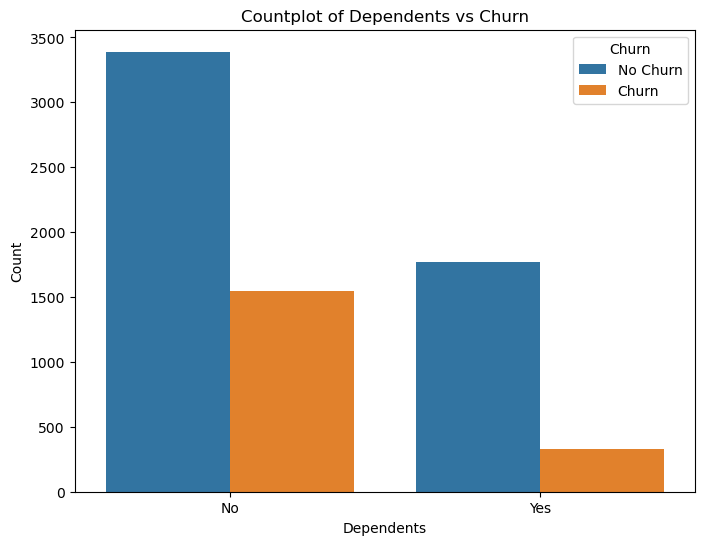

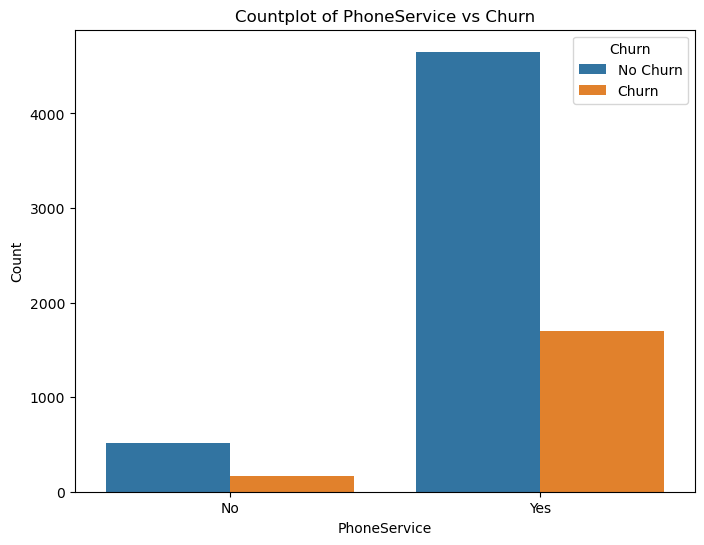

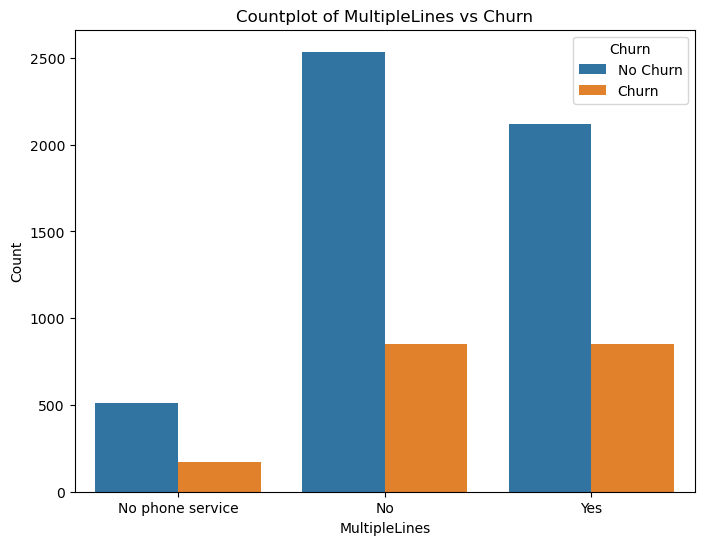

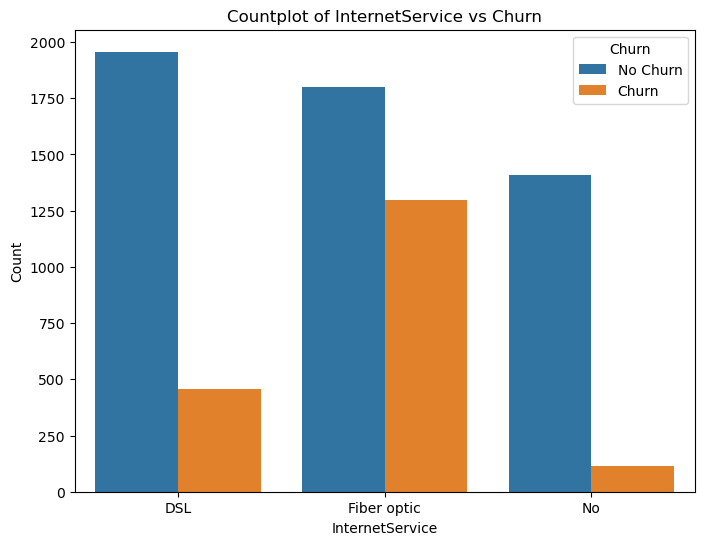

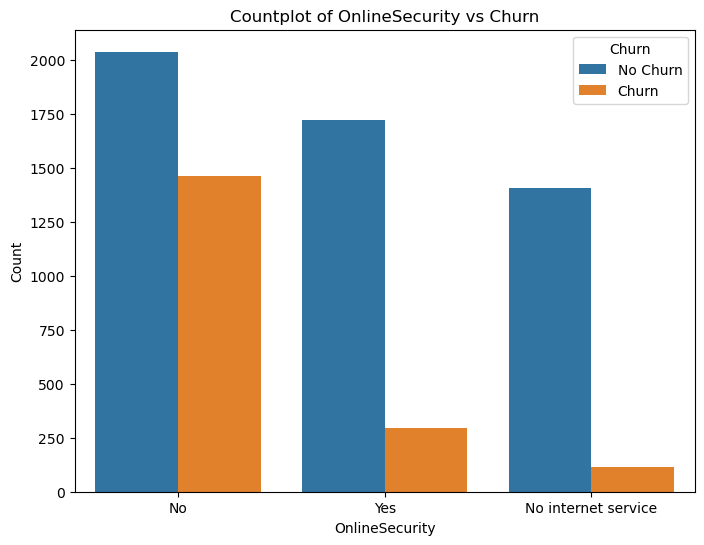

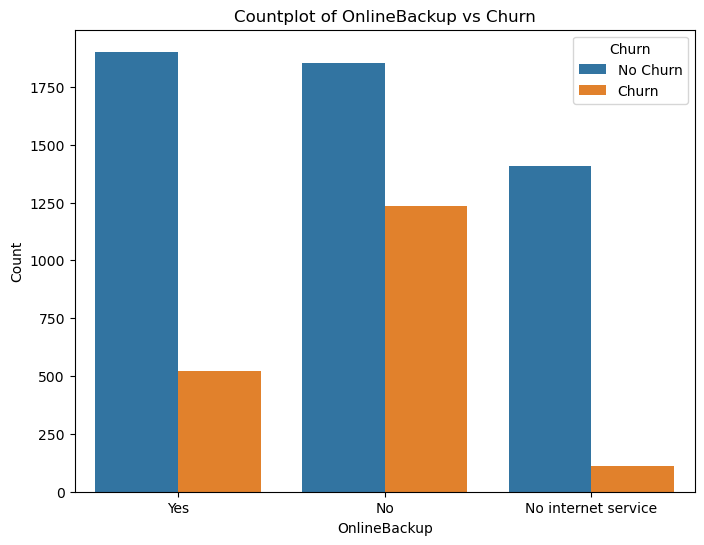

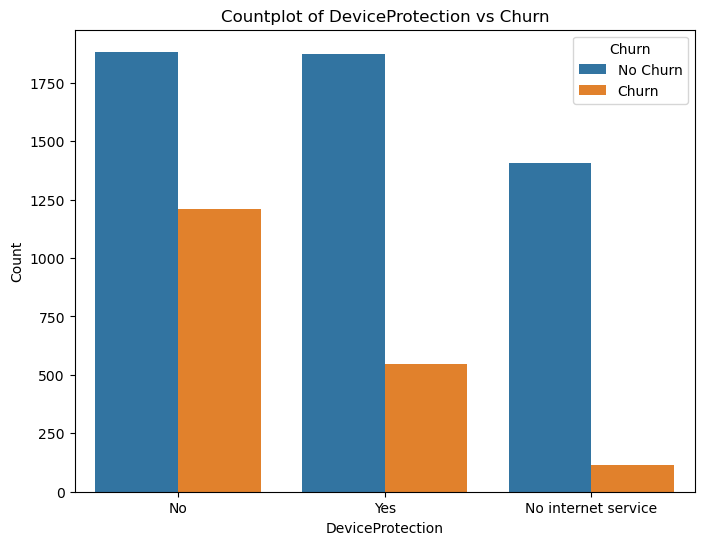

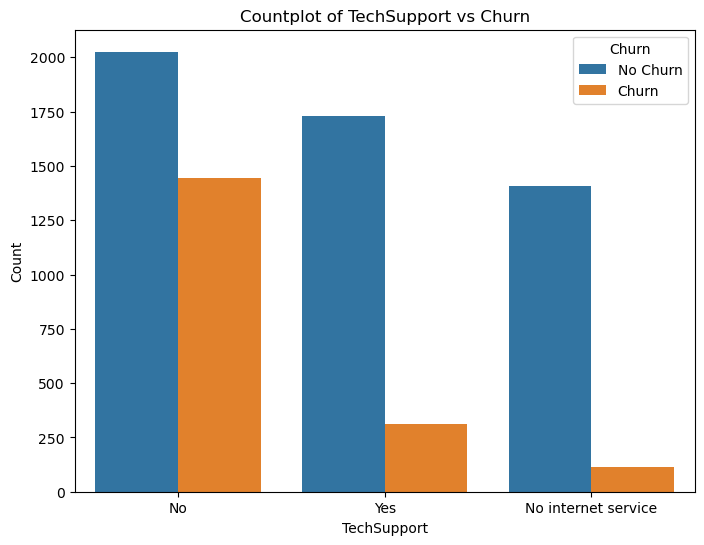

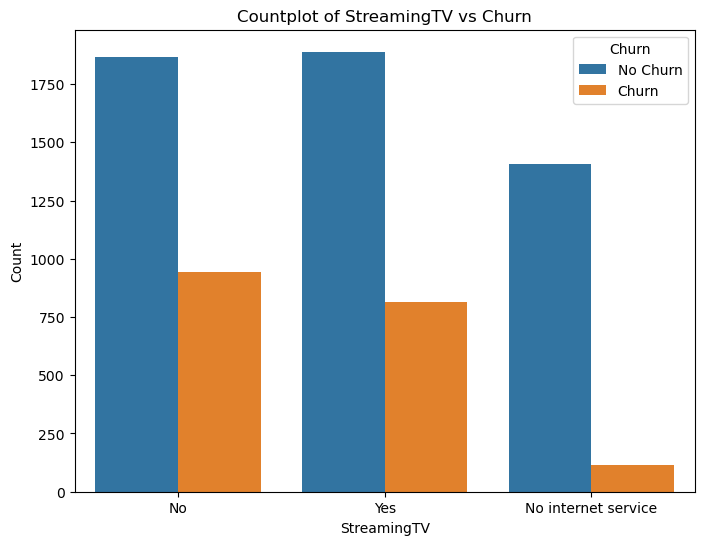

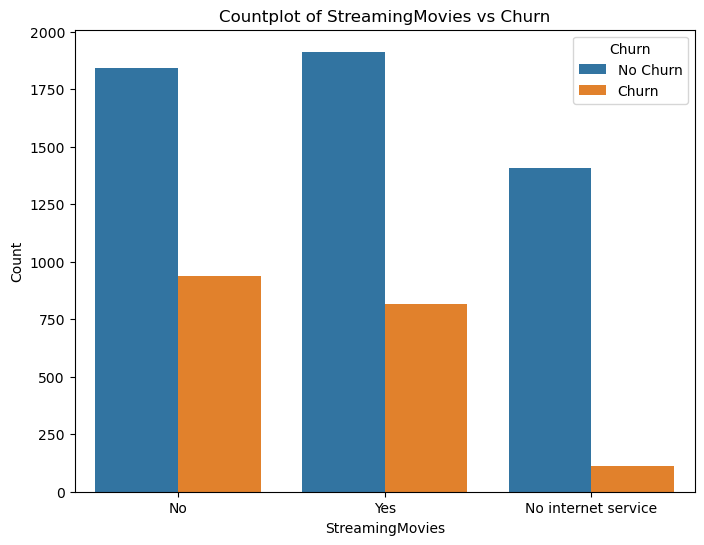

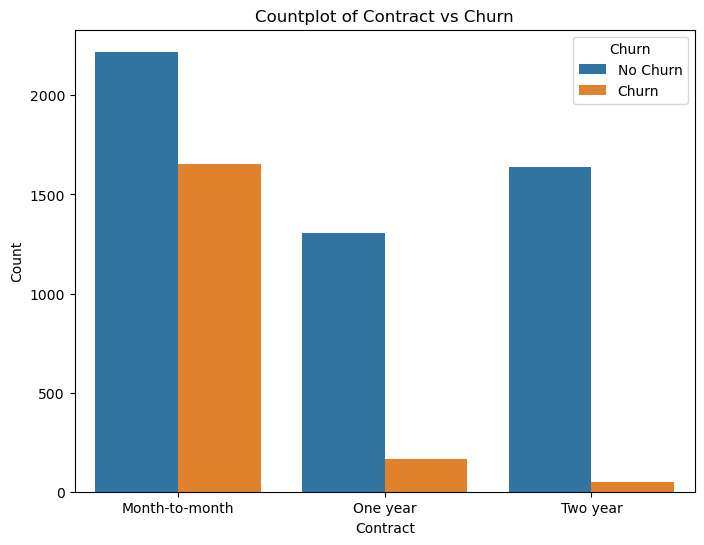

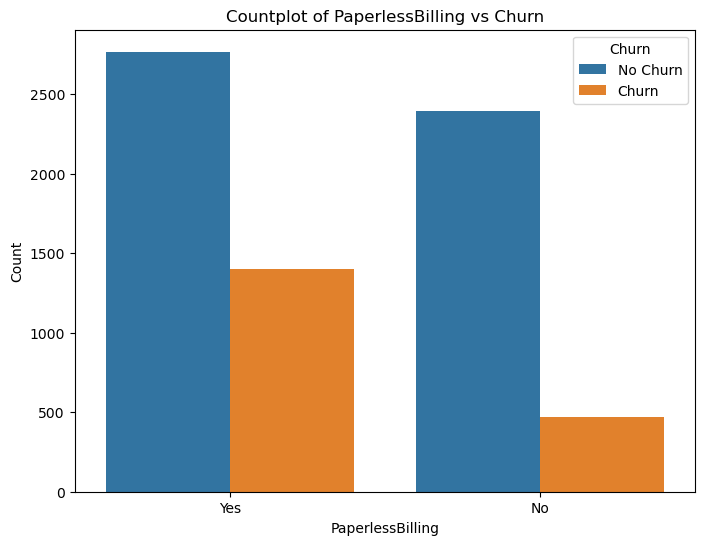

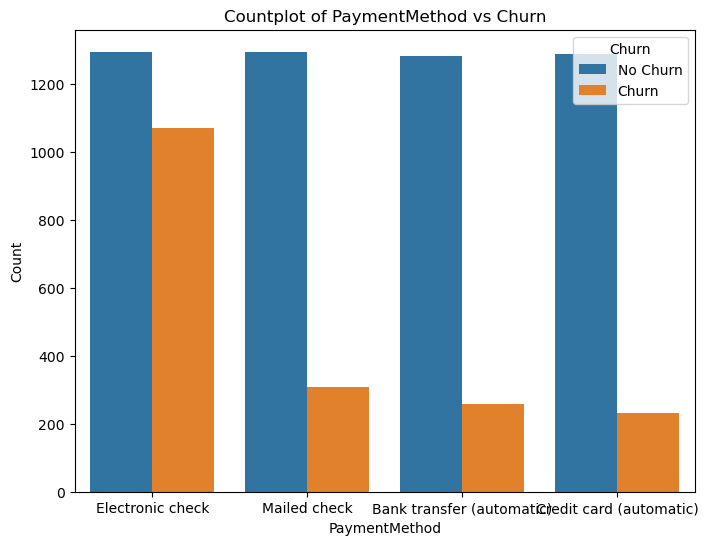

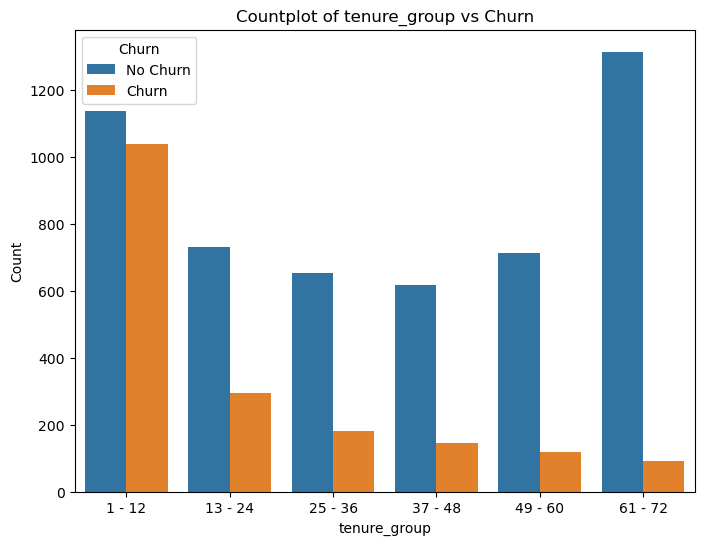

In [25]:
for column in copy_dataset.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges']):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=copy_dataset, x=column, hue='Churn')
    plt.title(f'Countplot of {column} vs Churn')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Churn', labels=['No Churn', 'Churn'])
    plt.show()

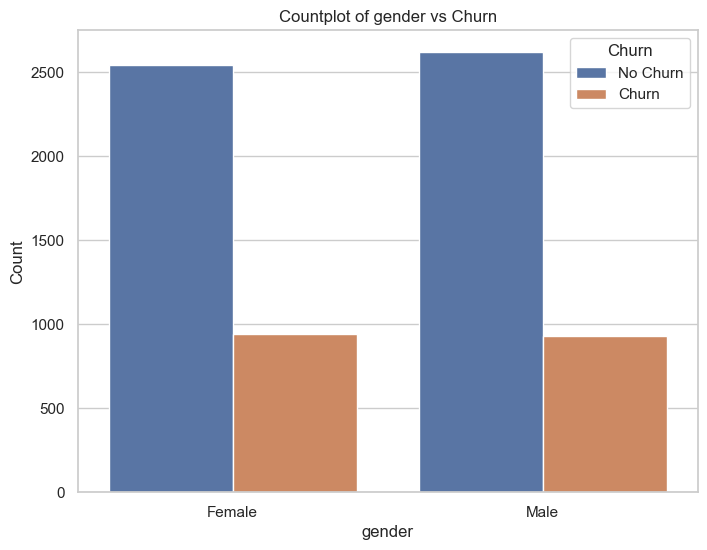

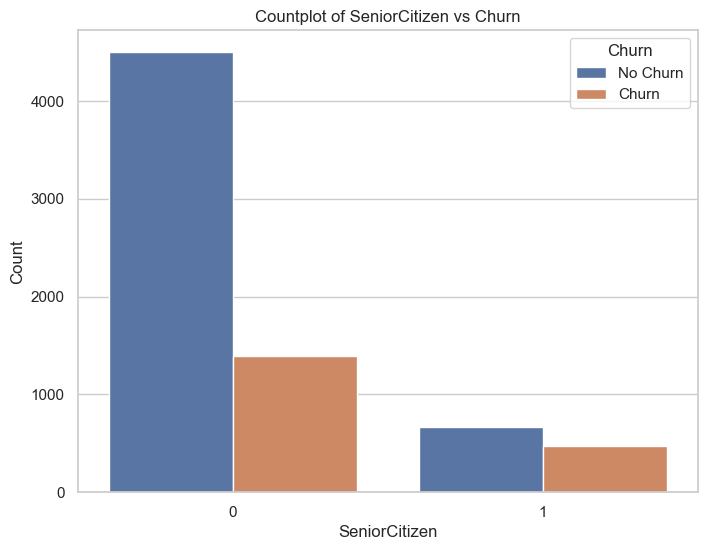

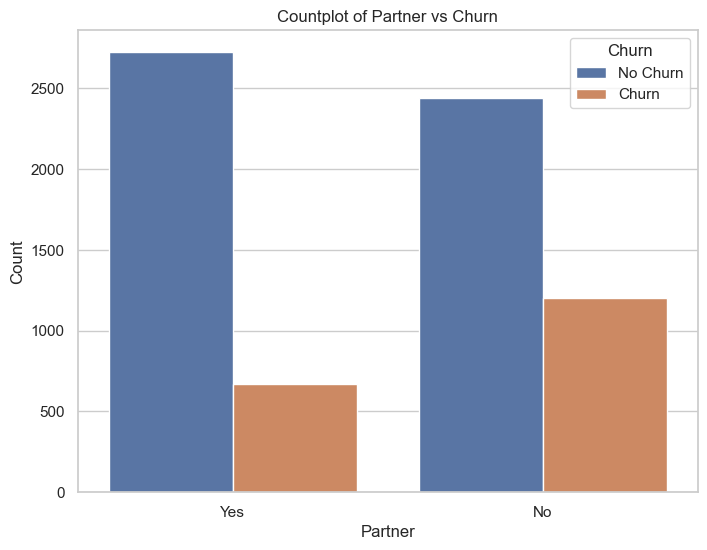

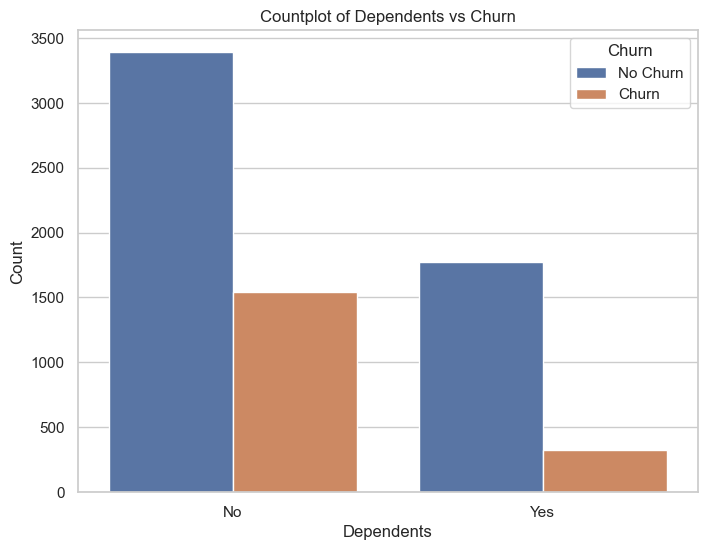

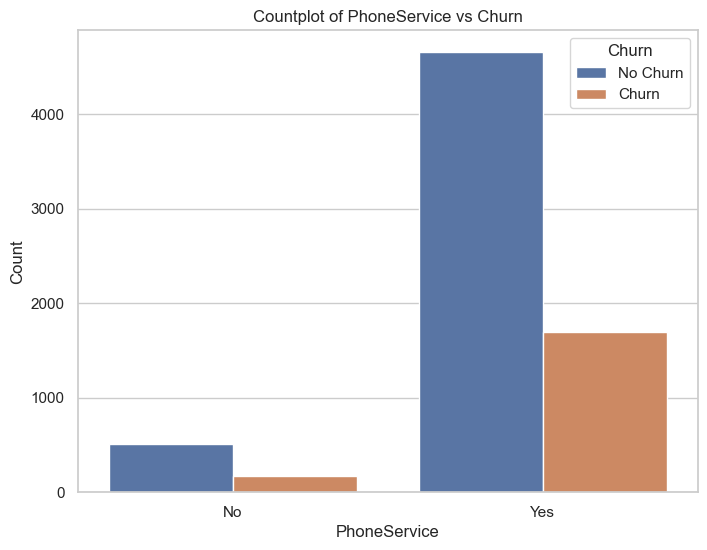

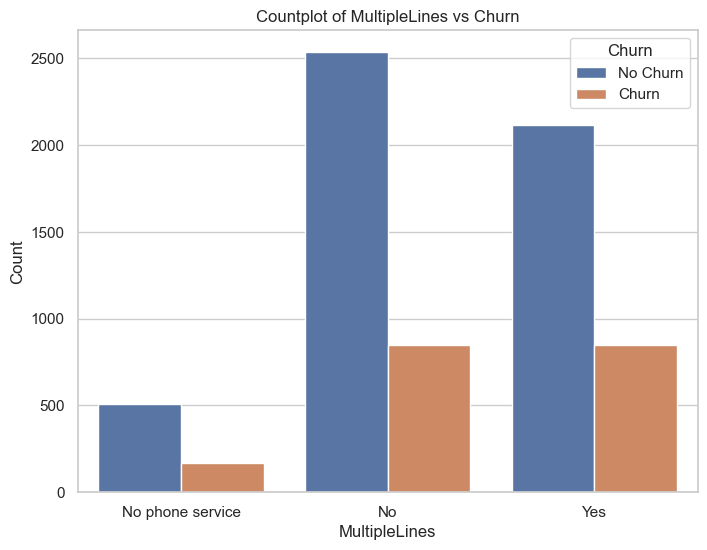

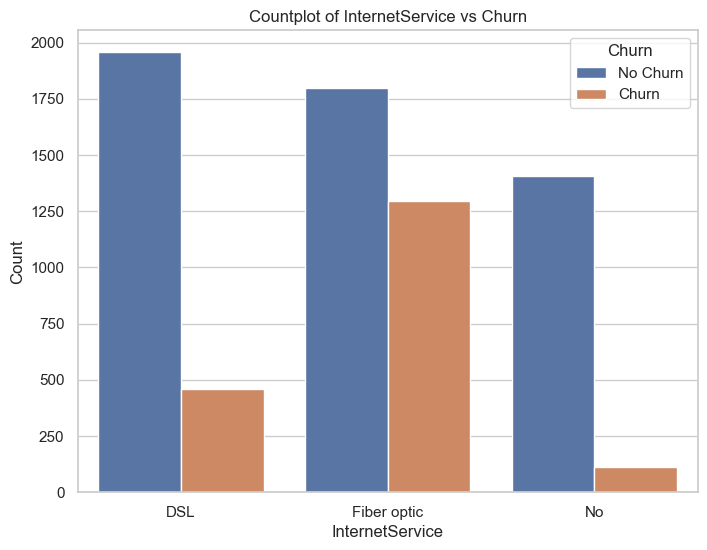

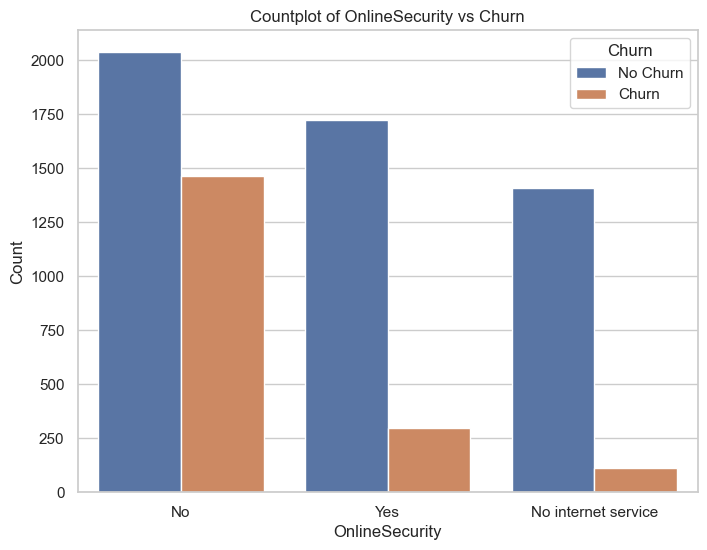

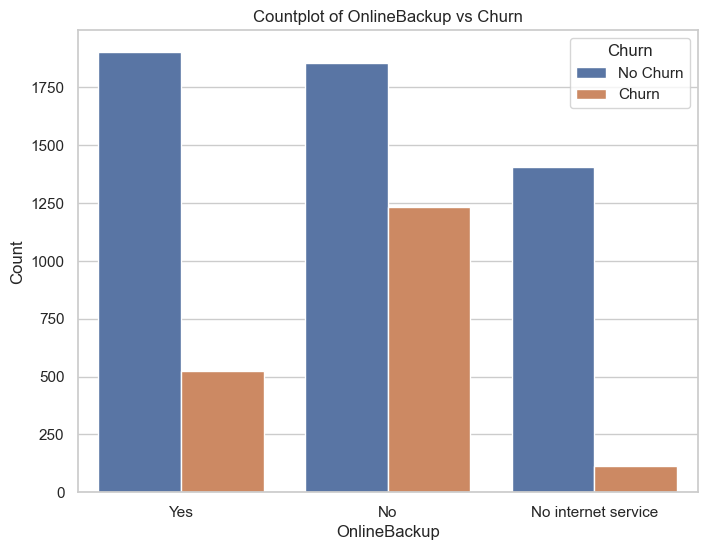

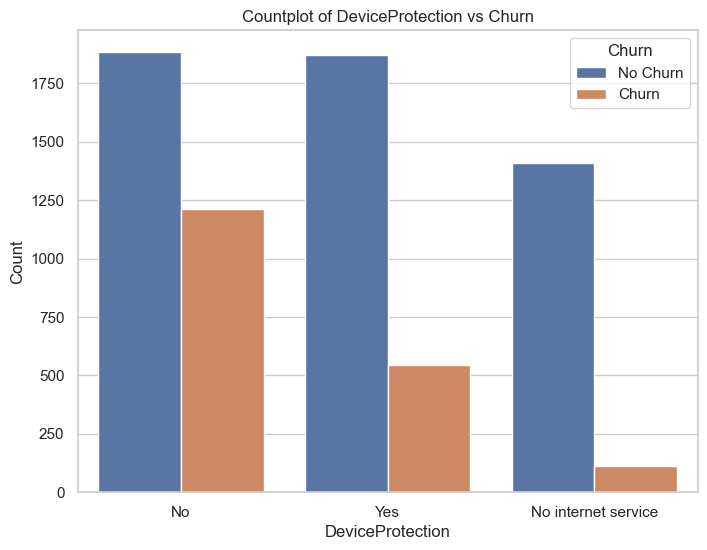

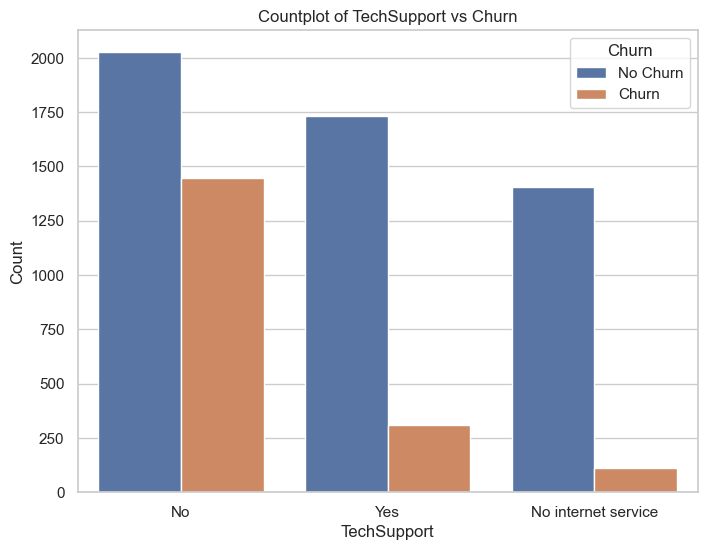

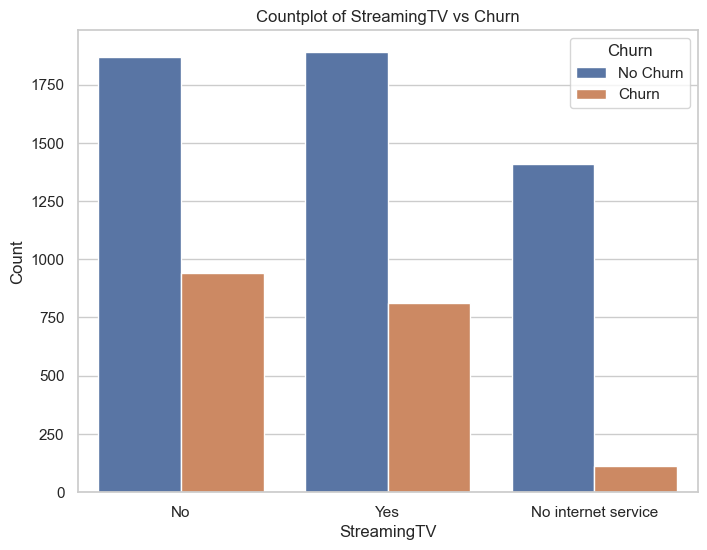

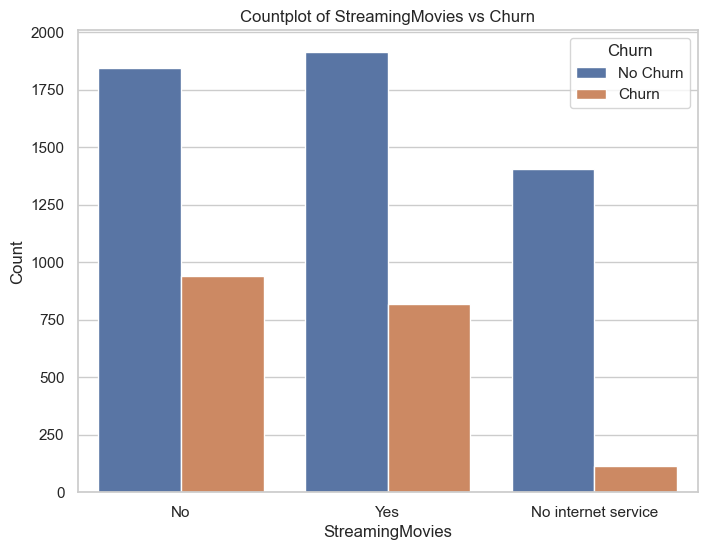

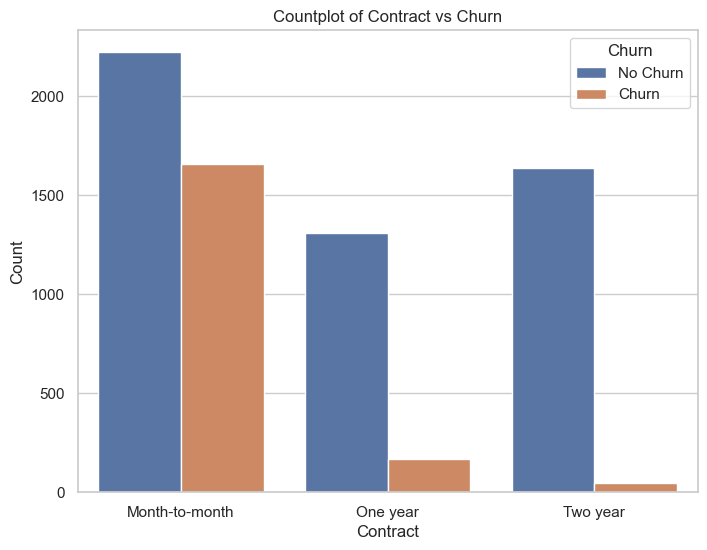

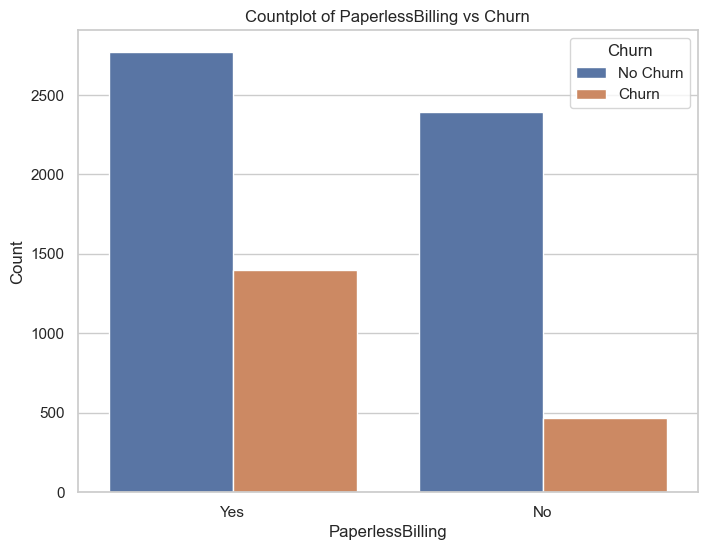

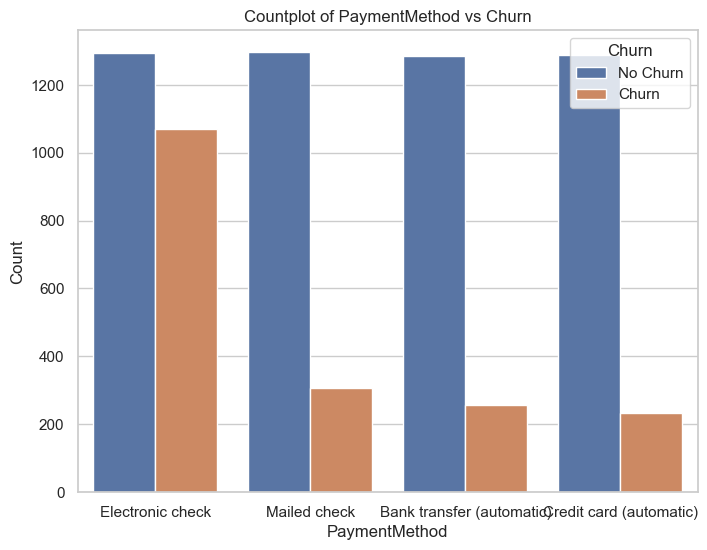

- Transforming the target variable **'Churn'** into a binary form, where **'Yes'=1** and **'No=0.**

In [26]:
copy_dataset['Churn'] = np.where(copy_dataset.Churn == 'Yes', 1, 0)

In [27]:
copy_dataset.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [28]:
copy_dataset['Churn'].unique()

array([0, 1])

- Converting all the categorical variable to dummy variables

In [29]:
copy_dataset_dummies = pd.get_dummies(copy_dataset)
copy_dataset_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


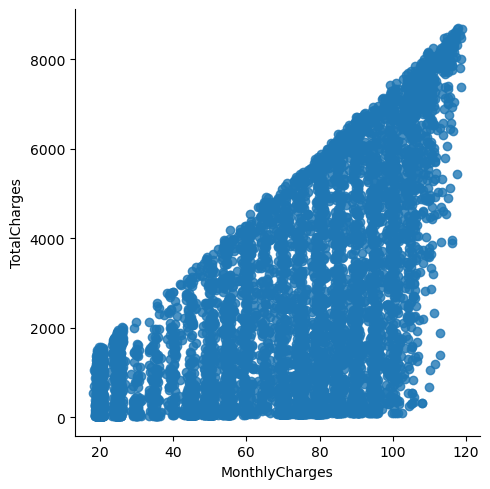

In [30]:
# Relation ship between the the Monthly charges and Total charges
sns.lmplot(data = copy_dataset_dummies, x ='MonthlyCharges', y='TotalCharges', fit_reg= False)

- Total charges increases as Monthly charges increases as expected

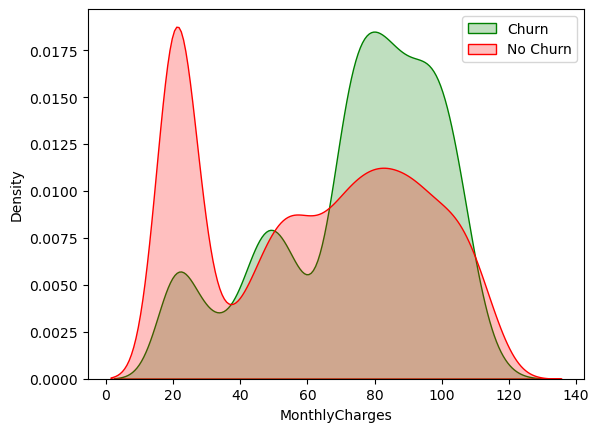

In [31]:
sns.kdeplot(copy_dataset_dummies.MonthlyCharges[copy_dataset_dummies.Churn == 1], shade=True, color='green')
sns.kdeplot(copy_dataset_dummies.MonthlyCharges[copy_dataset_dummies.Churn == 0], shade=True, color='red')
plt.legend(['Churn', 'No Churn'])

**Observation:** By observing above we gain an insight that churn is high when the MonthlyCharges are high

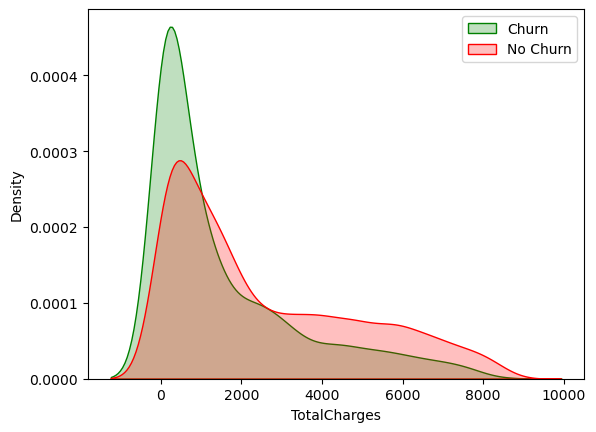

In [32]:
sns.kdeplot(copy_dataset_dummies.TotalCharges[copy_dataset_dummies.Churn == 1], shade=True, color='green')
sns.kdeplot(copy_dataset_dummies.TotalCharges[copy_dataset_dummies.Churn == 0], shade=True, color='red')
plt.legend(['Churn', 'No Churn'])

**observation:** churn is also high when the total charges are low

- However, when we look at the combined effects of three factors—how long a customer has been with us (tenure), how much they pay each month (MonthlyCharges), and their total spending (TotalCharges)—the situation becomes easier to understand: when customers pay more each month and stay with us for a shorter time, their total spending goes down. This means that when all three factors align—higher monthly payments, shorter time with us, and lower total spending—it's more likely for customers to leave.


<AxesSubplot:>

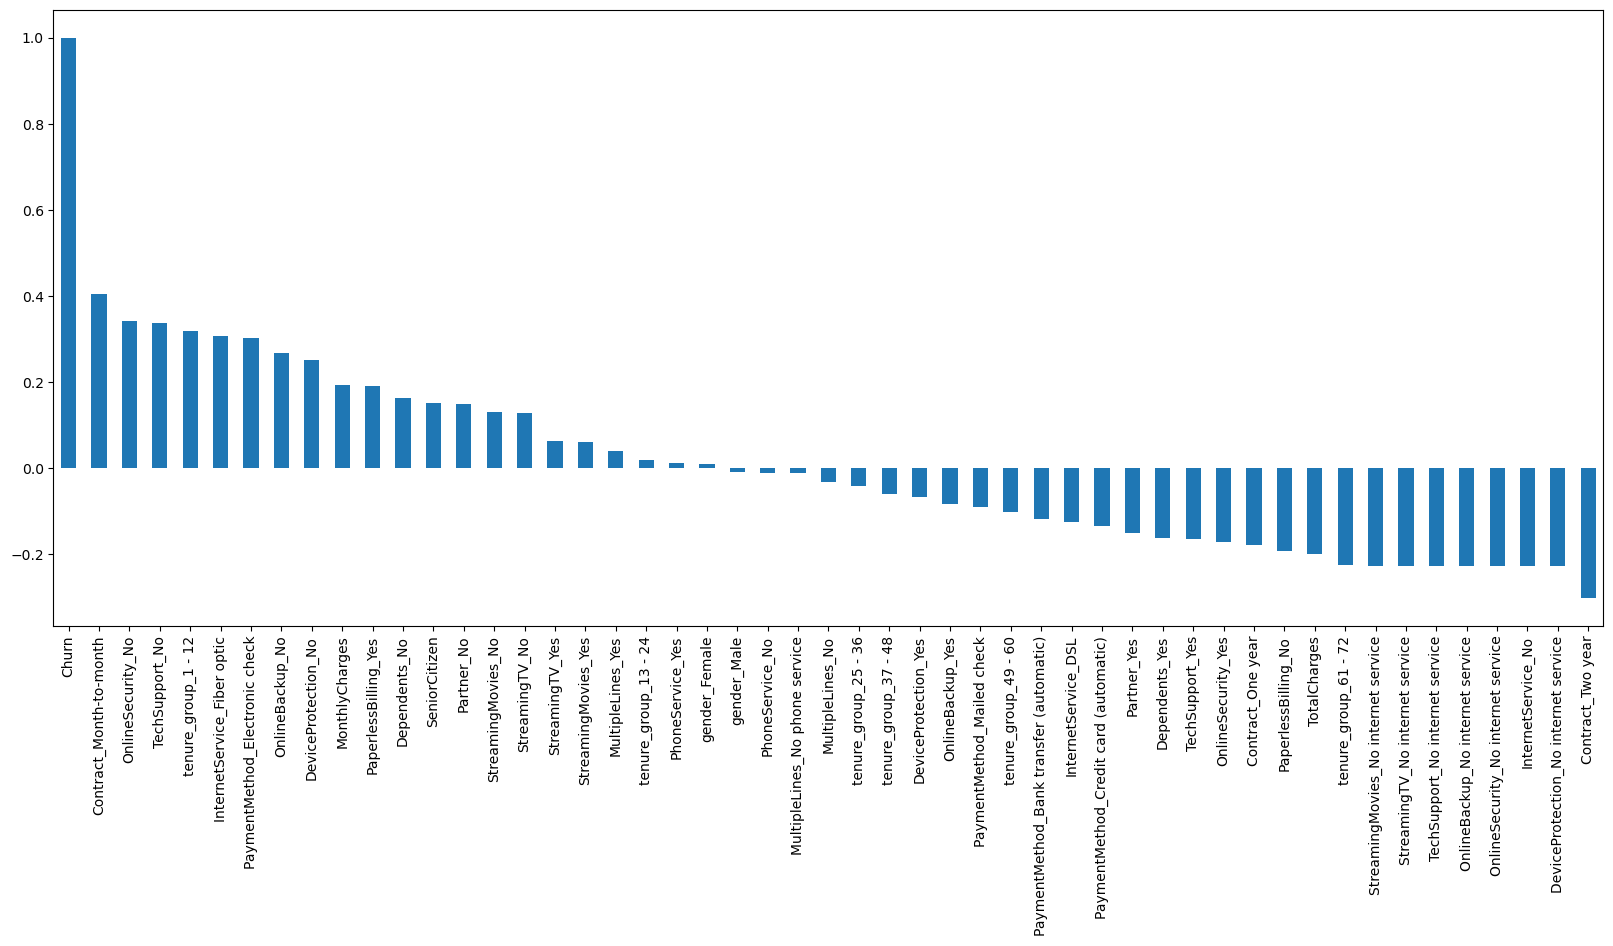

In [33]:
plt.figure(figsize=(20,8))
copy_dataset_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

**By Observing above analysis:**
- There are **High Churn** in Case of **Month to month contracts, No Online security, No tech support, fiber optics internet service, electronic check method, First year of subscription**
- **low Churn** in case of **long term contracts, subscription without internet service, customer engaged for 5 years**

<AxesSubplot:>

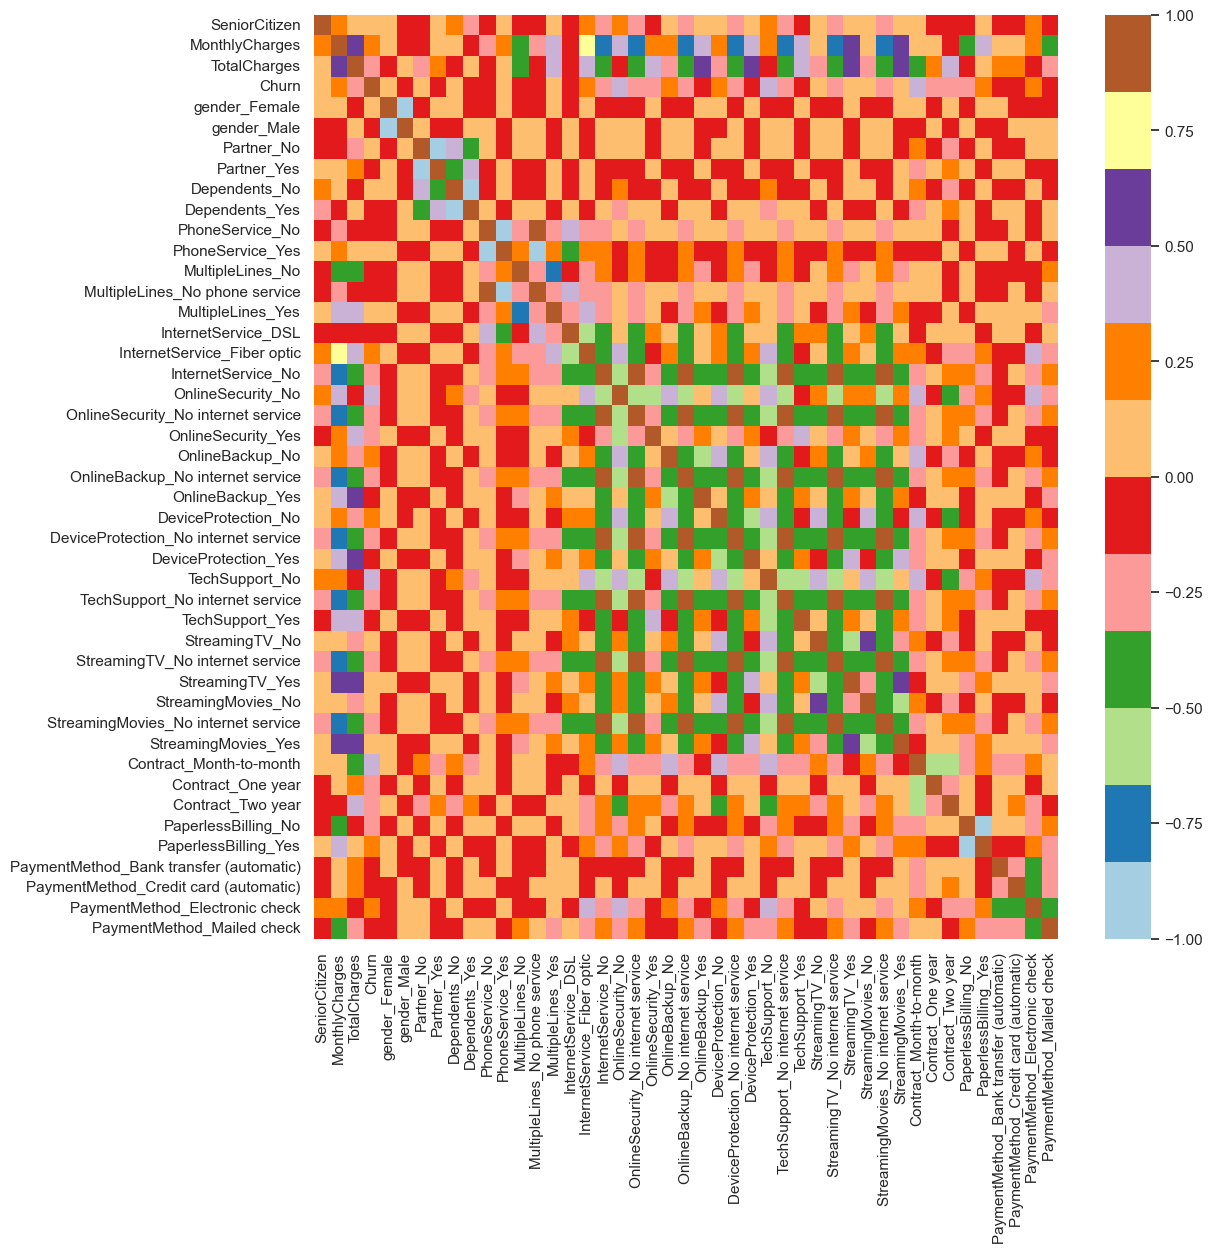

In [154]:
plt.figure(figsize=(12,12))
sns.heatmap(copy_dataset_dummies.corr(), cmap='Paired')

### Bi-Variate analysis

In [34]:
target_0_df = copy_dataset.loc[copy_dataset['Churn']==0]
target_1_df = copy_dataset.loc[copy_dataset['Churn']==1]

In [35]:
def uniplot(df, col, title, hue=None):
    sns.set(style='whitegrid', context='talk')
    
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')
    
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title=hue)
    
    plt.show()

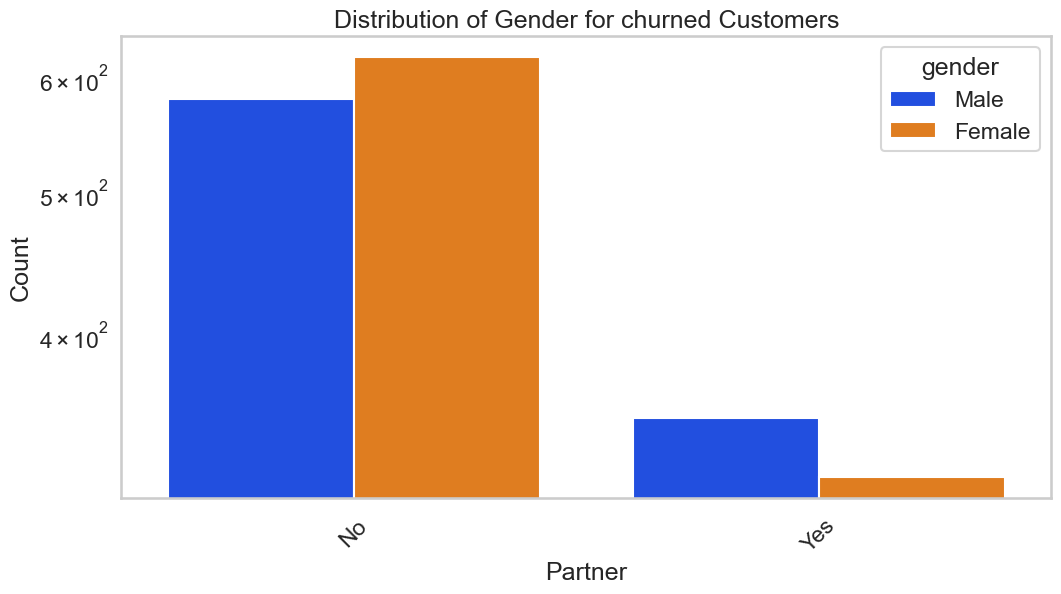

In [36]:
uniplot(target_1_df, col='Partner', title='Distribution of Gender for churned Customers', hue='gender')

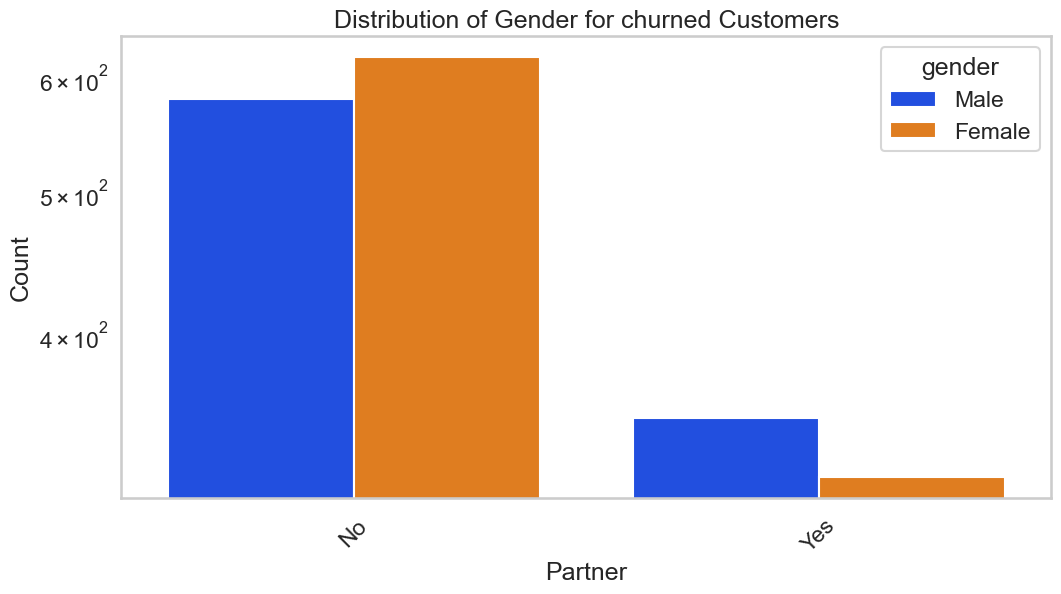

In [37]:
uniplot(target_1_df, col='Partner', title='Distribution of Gender for churned Customers', hue='gender')

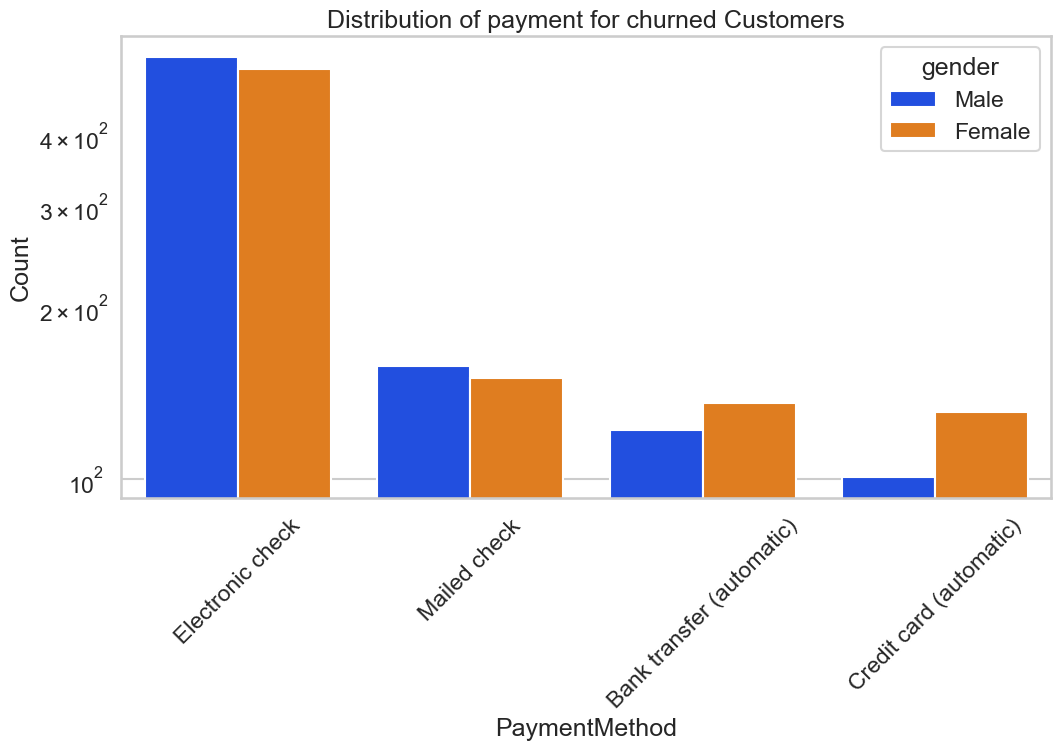

In [38]:
uniplot(target_1_df, col='PaymentMethod', title='Distribution of payment for churned Customers', hue='gender')

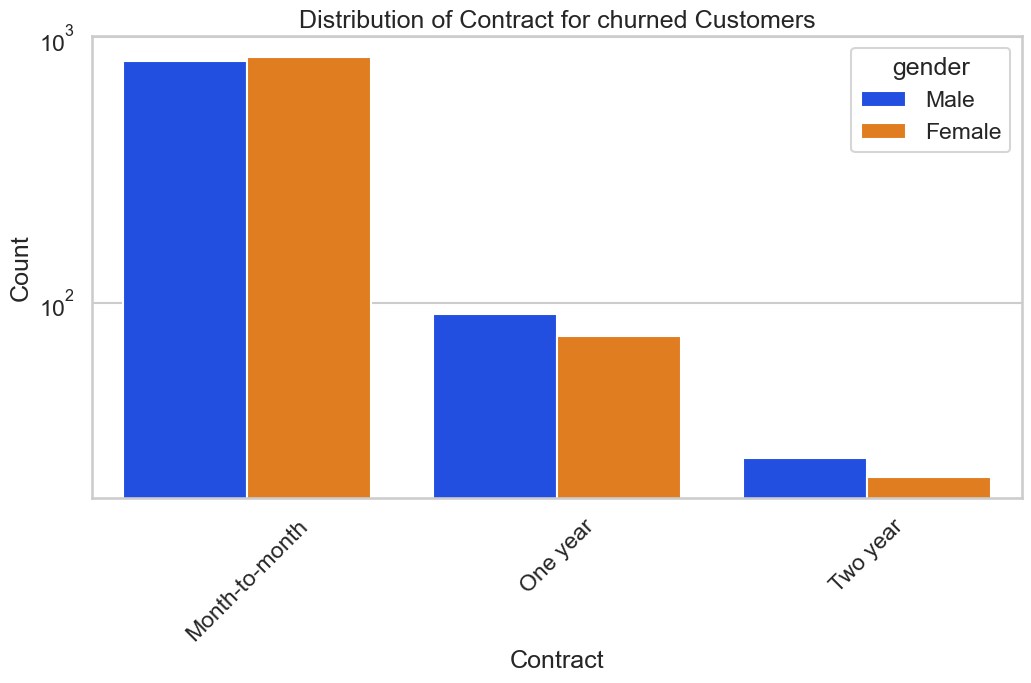

In [39]:
uniplot(target_1_df, col='Contract', title='Distribution of Contract for churned Customers', hue='gender')

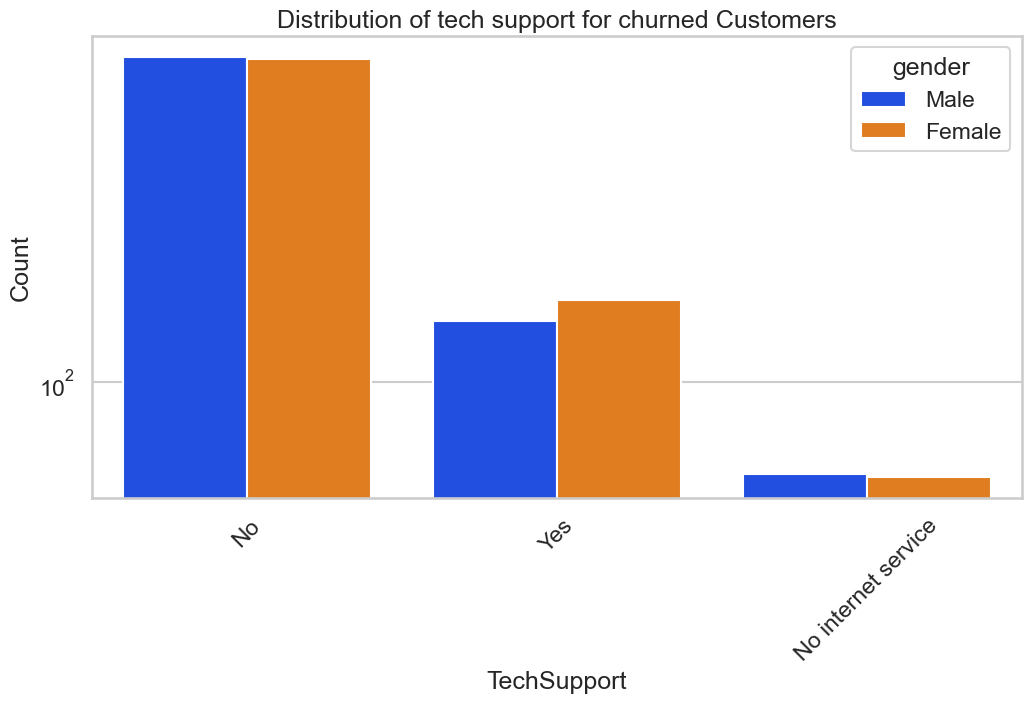

In [40]:
uniplot(target_1_df, col='TechSupport', title='Distribution of tech support for churned Customers', hue='gender')

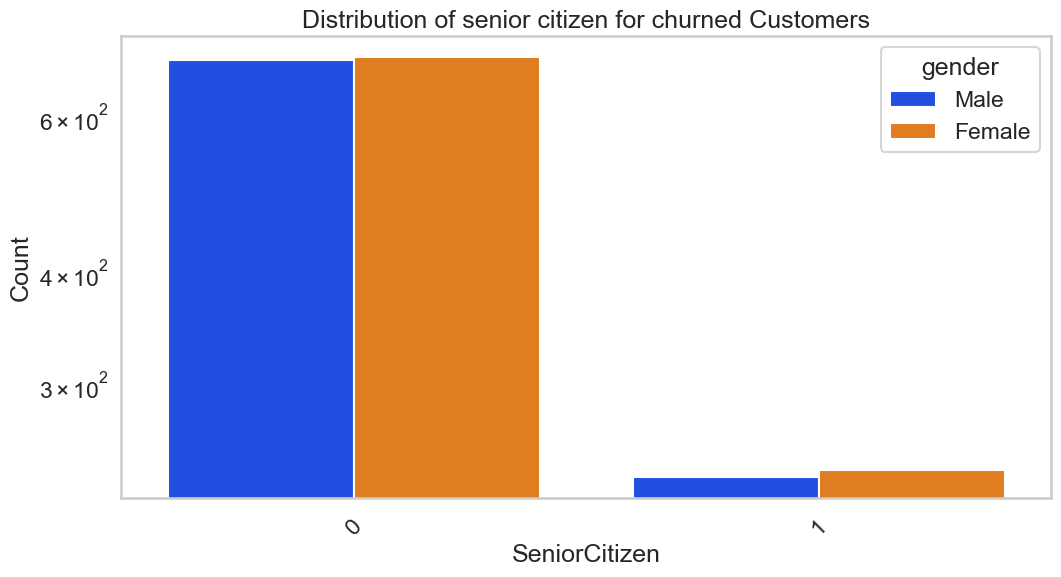

In [41]:
uniplot(target_1_df, col='SeniorCitizen', title='Distribution of senior citizen for churned Customers', hue='gender')

### Conclusion Drawn from above EDA
- electronic check medium are the highest churners
- Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
- No Online security, No Tech Support category are high churners
- Non senior Citizens are high churners

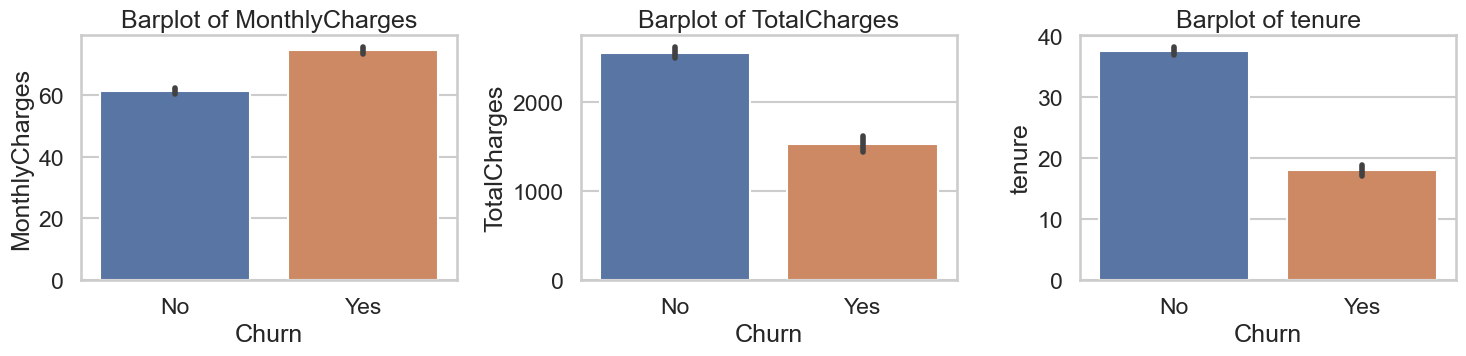

In [59]:
#### Multi-variate analysis
numeric_fea=['MonthlyCharges', 'TotalCharges', 'tenure']
plt.figure(figsize=(15, 10))

for idx, feature in enumerate(numeric_fea, 1):
    plt.subplot(3, 3, idx)
    sns.barplot(x='Churn', y=feature, data=copy_dataset)
    plt.title(f'Barplot of {feature}')
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.tight_layout()

**Observation**
- when the monthly charges are high customer is more likely to be churned
- if tenure is long term the custormer is less likely to be churned 

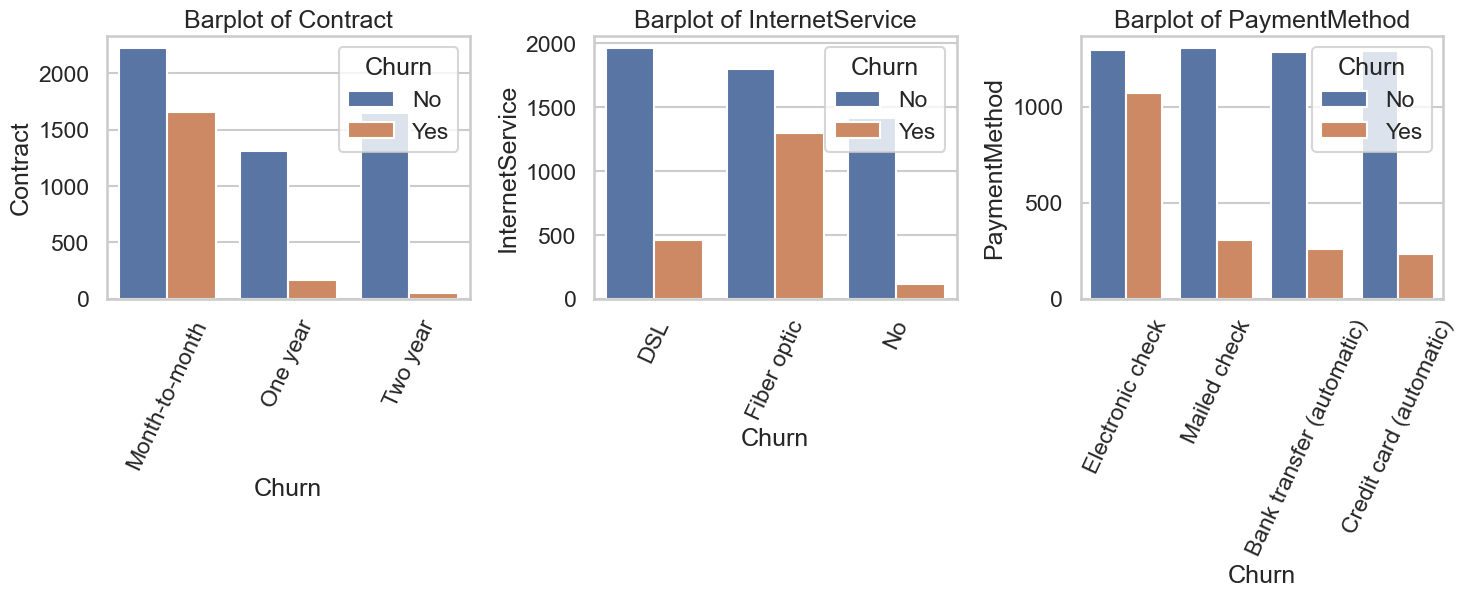

In [85]:
plt.figure(figsize=(15,15))
categorical_features = ['Contract', 'InternetService', 'PaymentMethod']
for idx, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, idx)
    sns.countplot(x=feature, hue='Churn', data=copy_dataset)
    plt.title(f'Barplot of {feature}')
    plt.xlabel('Churn')
    plt.xticks(rotation=65)
    plt.ylabel(feature)
    plt.tight_layout()

**Observation**
- We can observe above in the graphs that month to month are most churned and not churned followed by year churning and 2 year churning
- DSL internet service are less likely to be churned, fiber optics were most churned as compared to other internet services
- we can see in the third graph that electronic check payment method were the most churned customers

In [42]:
copy_dataset_dummies.to_csv('telco_churn.csv')